In [ ]:
"""

# Project Caption:

Autogen-centric collaborative agent system for unsupervised task operation with Knowledge aggregation

# Project Foundations:

Make an end-to-end pipeline with Autogen including Agentic Chat The keys parts are:
•	Use open-source platform to make agentic AI system
•	System working as self-operating task with self-directed agents for programmatic coding, troubleshooting code, LLM supported summarization, report generation,
and adaptive reasoning powered by dialogue
Google Colab notebook includes: a network of agents, role specialization for each agent, and collaborative messaging among agents to gate key results.

# Primary Tools and Frameworks:

•	Python programming language
•	Autogen (AI agent pipeline)
•	OpenAI gpt model (LLMs)
•	Google Colab notebook
•	Parallel-agent self-managed

"""

In [ ]:
"""
# Project Intent:

Before starting this project, I made a list of goals:
•	Make a Machine-controlled Agentic-system using Autogen (Agentic AI). How ??
•	Framework design for collaborative LLM agent system
•	Facilitate agent-to-agent interaction without human guidance
•	Apply programmatic research and Knowledge synthesis workflows.

# Significant Points:
•	Install all necessary items associated with Autogen used for Agentic chat
•	Defines parameter management JSON used for LLM settings
•	Run a network of self-governing agents (UserProxyAgent, AssistantAgent,  GroupChat and GroupChatManager)


"""

In [ ]:
import os

In [1]:
#  Make the workspace for AutoGen agent-oriented task sequence

#!pip install autogen-agentchat==0.2.38

In [ ]:
from getpass import getpass

os.environ['OPENAI_API_KEY'] = getpass('put OpenAI API key: ')

put OpenAI API key: ··········


In [ ]:
# In this project, AutoGen needs a json configuration file that keeps all necessary parameters for the model. Model is used to communicate with OpenAI’s API.

import json

# set  gpt-4 configuration
configuration_list = [{
        'model': 'gpt-4o-mini',         # I am using gpt-4o-mini for creating conversations with systems and agents.
        'api_key': os.environ['OPENAI_API_KEY'],
        'base_url': 'https://api.openai.com/v1',
        'temperature': 0.25,
        'max_tokens': 3500,
        'stream': False }]

# Save this configuration file into a json file.
with open('configuration_list_gpt.json', 'w') as p:       # Later, I need this file for AutoGen to launch agent configuration.
    json.dump(configuration_list, p, indent=8)

In [ ]:
# USE this function (config_list_from_json) to load a json file.
from autogen import config_list_from_json


configuration_list_gpt4 = config_list_from_json('configuration_list_gpt.json')

In [ ]:
from autogen import AssistantAgent

assistant_agent = AssistantAgent(
    name = 'assistant_first',
    llm_config = configuration_list_gpt4[0])
print(assistant_agent)

# Need to use UserProxyAgent to make agent (user)  # user can communicate with other agents,

# Generate UserProxyAgent instance
from autogen import UserProxyAgent

user_proxy_agent = UserProxyAgent(name = 'user_proxy_agent_first')    # can send messages to other agents

print(user_proxy_agent)

In [ ]:
user_proxy_agent.initiate_chat(
    assistant_agent,
    message = '''Research as well as visualize the nine-month stock growth of Amazon, Apple, Google, and Microsoft.
    Evaluate their price patterns using a single plot, and save the graph as comparing_stock_price_change_App_Micro_Ama_Goog.jpg.'''
)

user_proxy_agent_first (to assistant_first):

Research as well as visualize the nine-month stock growth of Amazon, Apple, Google, and Microsoft.
    Evaluate their price patterns using a single plot, and save the graph as comparing_stock_price_change_App_Micro_Ama_Goog.jpg.

--------------------------------------------------------------------------------
assistant_first (to user_proxy_agent_first):

To accomplish this task, we will follow these steps:

1. **Collect Stock Price Data**: We'll use the `yfinance` library to fetch the stock price data for Amazon (AMZN), Apple (AAPL), Google (GOOGL), and Microsoft (MSFT) for the last nine months.
2. **Visualize the Data**: We'll use `matplotlib` to create a line plot that compares the stock price changes of these companies.
3. **Save the Plot**: Finally, we'll save the plot as a JPEG file named `comparing_stock_price_change_App_Micro_Ama_Goog.jpg`.

Let's proceed with the code to achieve this.

```python
# filename: stock_price_comparison.py

ChatResult(chat_id=None, chat_history=[{'content': 'Research as well as visualize the nine-month stock growth of Amazon, Apple, Google, and Microsoft.\n    Evaluate their price patterns using a single plot, and save the graph as comparing_stock_price_change_App_Micro_Ama_Goog.jpg.', 'role': 'assistant', 'name': 'user_proxy_agent_first'}, {'content': "To accomplish this task, we will follow these steps:\n\n1. **Collect Stock Price Data**: We'll use the `yfinance` library to fetch the stock price data for Amazon (AMZN), Apple (AAPL), Google (GOOGL), and Microsoft (MSFT) for the last nine months.\n2. **Visualize the Data**: We'll use `matplotlib` to create a line plot that compares the stock price changes of these companies.\n3. **Save the Plot**: Finally, we'll save the plot as a JPEG file named `comparing_stock_price_change_App_Micro_Ama_Goog.jpg`.\n\nLet's proceed with the code to achieve this.\n\n```python\n# filename: stock_price_comparison.py\nimport yfinance as yf\nimport matplotli

[*********************100%***********************]  4 of 4 completed


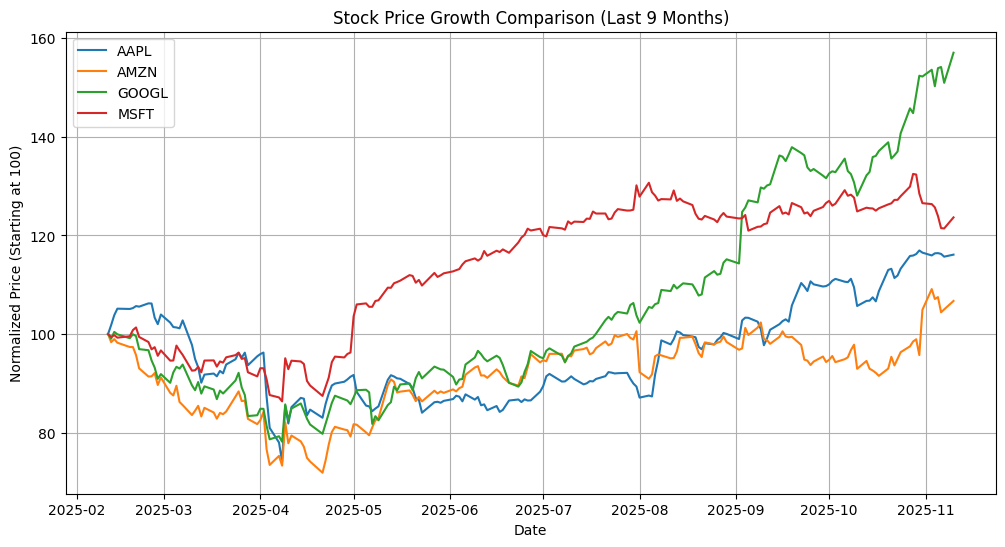

In [ ]:
# visualize the nine-month stock growth
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the stock symbols and the time period
stocks = ['AMZN', 'AAPL', 'GOOGL', 'MSFT']
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(months=9)

# Download stock data
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=True)['Close']

#  Normalize the data to start at 100 for comparison
normalized_data = data / data.iloc[0] * 100


# Plot the data
plt.figure(figsize=(12, 6))
for stock in normalized_data.columns:
    plt.plot(normalized_data.index, normalized_data [stock], label=stock)


plt.title('Stock Price Growth Comparison (Last 9 Months)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')
plt.legend()
plt.grid()
plt.savefig('comparing_stock_price_change_App_Micro_Ama_Goog.jpg')
plt.show()


In [ ]:
# state large language model (LLM) configuration
# Choose your own model.

llm_gpt4_turbo_configuration = {'model': 'gpt-4-turbo', 'max_tokens': 999, 'presence_penalty': 0.25, 'temperature': 0.25, 'response_format': {'type': 'text'},
    'top_p': 0.8, 'frequency_penalty': 0.25, 'seed': 101}


In [ ]:
from IPython.display import Markdown

In [ ]:
# load UserProxyAgent

from autogen import UserProxyAgent

In [ ]:
user_proxy_agent  =  UserProxyAgent(
    name = 'project_supervisor',
    system_message = (
        'You are the project supervisor (project_supervisor). Your job is to review overall project workflow.'
         'You are required to collaborate with the task_architect for auditing and then optimizing suggested approach.'
        'You can only consider a strategic proposal when it shows fully well-structured with practical planning.'
        'When you have a completed plan, you need to communicate two agents (code_engineer and research_analyst).'
         'They are going to review their tasks and then move their project for the next steps. However, your comments play key roles in holding project quality.'),
    code_execution_config = False)
#  The project_supervisor’ cannot carry out code.


In [ ]:
from autogen import AssistantAgent

In [ ]:
task_architect_agent = AssistantAgent(name = 'task_architect',
        llm_config = llm_gpt4_turbo_configuration,
        system_message=(
        'You are the  task_architect agent. Your main job is to make the project workflow and then communicate with other agents for getting the project goals.'
        'Your job involves:  make a detail plan to complete the project, decide which tasks will good for code_engineer who can write and run code, and'
        'which tasks will be appropriate for research analyst who studies and organizes tasks, adjust the plan frequently according to comments received from'
        'the project_supervisor, and quality_reviewer until the project_supervisor accepts the plan, Make sure all steps are  practical, and sequential, provide'
        'clear instructions for planning, illustrating roles and responsibilities, operation sequence, target results, and  only initiate the next step from'
        'final comments from the project_supervisor.'))


In [ ]:
code_engineer_agent = AssistantAgent(name = 'code_engineer',
    llm_config = llm_gpt4_turbo_configuration,
    system_message=(
        'You are the code engineer. You are doing coding under the assigned plan from the task_architect_agent. You consider some key steps: construct Python code'
        'according to plan received from the task_architect agent, organize all code with code line comment within the script type that aligns with the Python'
        'language which is used, do not offer any code required to fix from others, do not include more than one code block for same result without any reasons,'
        'do not advise any users to handle results by hand, after processing the code, ensure correctness of results; as bugs appear, review the code and then'
        'provide properly functioning code, in case if coding project cannot solve, use various methods with acceptable assumptions, undertake only authorized tasks'
        'under the plan officially approved by the project_supervisor.'))


In [ ]:
research_analyst_agent = AssistantAgent(name = 'research_analyst',
    llm_config = llm_gpt4_turbo_configuration,
    system_message = (
        'You are the research_analyst. You consider the plan obtained from the task_architect, and formally accepted from the project_supervisor.'
        'Your assignments involve: explore all results such as abstracts, text data (reports) received from other agents, assign information to categories organized'
        'by scientific classification, after your interpretation, suggest improvements, do not change any code; apply efforts totally on reviewing and organizing'
        'information, communicate with task_architect, and other agents to provide informed recommendations for improving the consistency of the output, make sure'
        'all research  includes the accepted plan and desired project results.'))


In [ ]:
qualityreviewer_agent = AssistantAgent(name = 'quality_reviewer',
    llm_config = llm_gpt4_turbo_configuration,
    system_message = (
        'You are the qualityreviewer. You can review all work done by other agents in the workflow. Your core duties involve: analyze the framework outlined by'
        'the task_architect to make sure it is well-structured, and realistic, evaluate code developed from the code engineer for accuracy, and consistency with'
        'the plan, inspect result obtained from the research analyst as well as other agents for exactness as well as understandability, examine that documentation'
        'is justified by authenticated sources such as urls, datasets, give well-defined and actionable guidance to other agents for advancing their output, do not'
        'produce or run code, make sure that each review is coherent with the provided plan.'))


In [ ]:
from autogen import GroupChat

In [ ]:
group_pchat = GroupChat(agents = [user_proxy_agent, task_architect_agent, code_engineer_agent, research_analyst_agent, qualityreviewer_agent],
    max_round = 7, messages = [])

In [ ]:
from autogen import GroupChatManager

In [ ]:
group_chat_manager = GroupChatManager(groupchat = group_pchat, llm_config = llm_gpt4_turbo_configuration)


In [ ]:
query_message = '''
 Your primary objective is to recognize five up-to-date research articles from 2022 to 2025 which correspond to the artificial intelligence (AI) domains such as
 Python oriented machine learning, Python implemented deep learning, Natural Language Processing (NLP), Large Language Models (LLMs), and Agentic AI. Each publication
 should include at least one of the areas (business, healthcare, education, AI research, and career paths in Agentic AI). For each publication, you need to include
 summary (2-3 sentences), fields of implementation such as education, healthcare, etc.), authors (last name, and first initial name), publication date, and a simulated
 but authentic-looking scientific article URL. At the end, you have to insert your results in a markdown table which contains a list of columns (Authors, article title,
 field, year, summary, and simulated url). After this table, you need to provide (1) a summary paragraph which reflects how these articles cover fields of implementation
 in current world AI such as LLMs and Agentic AI, and (2) point out any openings in business, healthcare, and education AI operationalization.
'''


In [ ]:
user_proxy_agent.initiate_chat(group_chat_manager , message = query_message)

project_supervisor (to chat_manager):


 Your primary objective is to recognize five up-to-date research articles from 2022 to 2025 which correspond to the artificial intelligence (AI) domains such as
 Python oriented machine learning, Python implemented deep learning, Natural Language Processing (NLP), Large Language Models (LLMs), and Agentic AI. Each publication
 should include at least one of the areas (business, healthcare, education, AI research, and career paths in Agentic AI). For each publication, you need to include
 summary (2-3 sentences), fields of implementation such as education, healthcare, etc.), authors (last name, and first initial name), publication date, and a simulated
 but authentic-looking scientific article URL. At the end, you have to insert your results in a markdown table which contains a list of columns (Authors, article title,
 field, year, summary, and simulated url). After this table, you need to provide (1) a summary paragraph which reflects how these a

ChatResult(chat_id=None, chat_history=[{'content': '\n Your primary objective is to recognize five up-to-date research articles from 2022 to 2025 which correspond to the artificial intelligence (AI) domains such as\n Python oriented machine learning, Python implemented deep learning, Natural Language Processing (NLP), Large Language Models (LLMs), and Agentic AI. Each publication\n should include at least one of the areas (business, healthcare, education, AI research, and career paths in Agentic AI). For each publication, you need to include\n summary (2-3 sentences), fields of implementation such as education, healthcare, etc.), authors (last name, and first initial name), publication date, and a simulated\n but authentic-looking scientific article URL. At the end, you have to insert your results in a markdown table which contains a list of columns (Authors, article title,\n field, year, summary, and simulated url). After this table, you need to provide (1) a summary paragraph which r

In [ ]:
"""
# Key Takeaways:

AI agents show self-managed teamwork with the Autogen architecture. It presents a repeatable architecture for: LLM agent collaboration, research involved in AI,
coordinated agent problem solving with input processing

"""